<div style="font-size:24px;"><b> Reaction Tests and Limitations </b></div>

<div style="font-size:11pt;"> 
This section contains automated tests that evaluate each function's functionality, performance, and reliability under different scenarios. It also applies restrictions on function inputs and behaviors to ensure they operate within their specified limits. </div>

<span style="font-size:14pt; text-decoration:underline;"> The Reactions Functions Import </span>


In [19]:
%run ./Reaction_Functions.ipynb

<span style="font-size:14pt; text-decoration:underline;"> Tests of the Wolf Kishner Huang Reduction  </span>

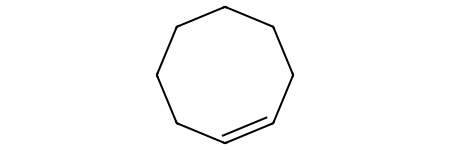

In [20]:
# Test 1  
start_smiles = "C1ccCC(=O)CCC1"
condition = "NH2NH2, KOH, 180°C"
WolfKishner_function(start_smiles, condition)

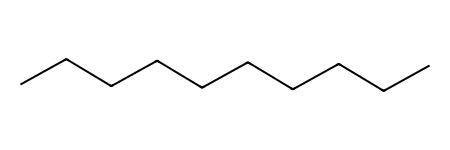

In [21]:
# Test 2 
start_smiles = "CCCC(=O)CCC(=O)CCC"
condition = "NH2NH2, KOH, 180°C"
WolfKishner_function(start_smiles, condition)

<div style="font-size:11pt;"> 
The limitation of this function is that it will reduce all carbonyls present in the molecule.</div>

In [22]:
# Test 3 
start_smiles = "CC(=O)CC(=O)CC"
condition = "NH2NH2, KOH, 180°C"
result = WolfKishner_function(start_smiles, condition)

assert result == "CCCC(=O)CC"

AssertionError: 

<span style="font-size:14pt; text-decoration:underline;"> Test of the Pinacol Rearrangement </span>

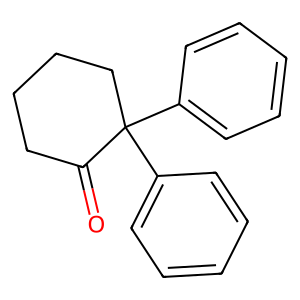

In [23]:
# Test 1
start_smiles = "C1CCCC1(O)C(O)(c1ccccc1)(c1ccccc1)"
result = Chem.MolFromSmiles(pinacol_function(start_smiles))
Draw.MolToImage(result)

<div style="font-size:11pt;"> 
The limitation of this reaction is that when we delete the start_pattern of the molecule, as it is symmetrical, this deletes all the atoms in the molecule and gives us an empty element. The latter cannot be processed by our neighbor_idx sub-function, whose purpose is to return the index of the neighboring carbon of a neighboring carbon of an oxygen. Even if we were able to solve this empty molecule problem by just using a ring with the same carbon number as the starting molecule, the code doesn't take into account the fact of having a single R12 element and having to make two bonds to attach it to the finish_pattern</div>

In [24]:
# Test 2
start_smiles ="OC1(C2(O)CCCC2)CCCC1"
pinacol_function (start_smiles)

[14:00:08] SMILES Parse Error: syntax error while parsing: .O=C1CCCCC1
[14:00:08] SMILES Parse Error: Failed parsing SMILES '.O=C1CCCCC1' for input: '.O=C1CCCCC1'


AttributeError: 'NoneType' object has no attribute 'GetSubstructMatches'

<span style="font-size:14pt; text-decoration:underline;"> Test of the Hydration of Carbonyls </span>

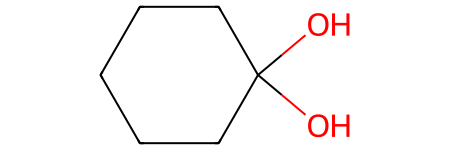

In [25]:
# Test 1
input_smiles = "C1CCC(=O)CC1"
condition = "H2O and acid"
Hydration_function(input_smiles, condition)


<div style="font-size:11pt;"> 
The limitation of this function is that it won't recognize the pattern if the molecule is an aromatic.</div>

In [26]:
# Test 2
input_smiles = "c1ccc(=O)cc1"
condition = "H2O and acid"
Hydration_function(input_smiles, condition)


[14:00:09] Can't kekulize mol.  Unkekulized atoms: 0 1 2 5 6


AttributeError: 'NoneType' object has no attribute 'HasSubstructMatch'

<span style="font-size:14pt; text-decoration:underline;"> Test of the Oxine Formation </span>

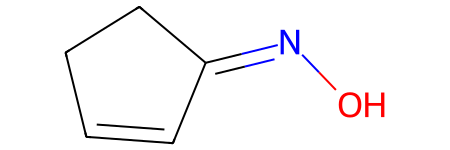

In [27]:
# Test 1 
start_smiles1 = "c1C(=O)cCc1"
start_smiles2 = "NO"      
OxineFormation_function(start_smiles1, start_smiles2)


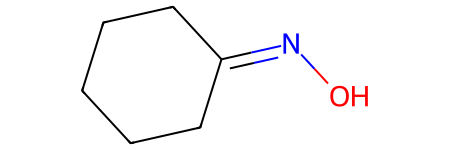

In [28]:
# Test 2 
start_smiles1 = "C1CCCC(=O)C1"
start_smiles2 = "NO"      
OxineFormation_function(start_smiles1, start_smiles2)


<span style="font-size:14pt; text-decoration:underline;"> Test of the Deprotonation of Carbonyls  </span>

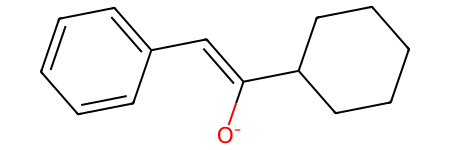

In [29]:
# Test 1 
input_smiles = "c1ccccc1CC(=O)C1CCCCC1"
carbonyles_deprotonation_function(input_smiles)

<div style="font-size:11pt;"> The limitation of this function is that it doesn't predict to have multiple carbonyls to deprotonate. In this case , it will only deprotonate one carbonyl and delete the rest and open the 6-carbons cycle. </div>

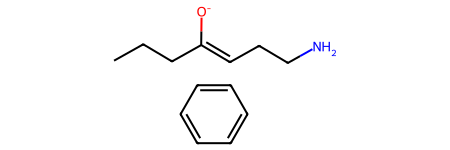

In [30]:
# Test 2 
input_smiles = "C(C)(C)C(=O)C(CN)CC(=O)c1ccccc1"
carbonyles_deprotonation_function(input_smiles)

<span style="font-size:14pt; text-decoration:underline;"> Test of the Addition of Cyanide </span>

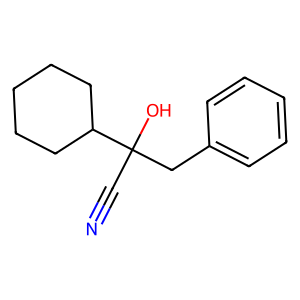

In [31]:
# Test 1
input_smiles = "c1ccccc1CC(=O)C1CCCCC1"
result = Chem.MolFromSmiles(addition_cyanide_function (input_smiles))
Draw.MolToImage(result)

<div style="font-size:11pt;"> The limitation of this function is that it doesn't predict to have multiple carbonyls to add to. In this case , it will only add one cyanide and delete the rest of the carbonyls consquently opening the 6-carbons cycle. </div>

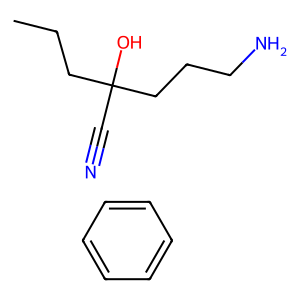

In [33]:
# Test 2 
input_smiles = "C(C)(C)C(=O)C(CN)CC(=O)c1ccccc1"
result = Chem.MolFromSmiles(addition_cyanide_function (input_smiles))
Draw.MolToImage(result)

<span style="font-size:14pt; text-decoration:underline;"> Test of the Hydrolysis of Cyanohydrine  </span>

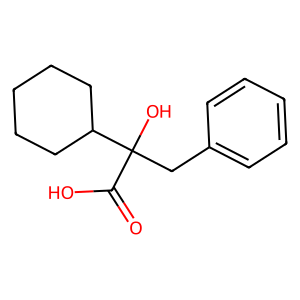

In [34]:
# Test 1 
input_smiles = 'N#CC(O)(Cc1ccccc1)C1CCCCC1'
result = Chem.MolFromSmiles(hydrolysis_cyanohydrine_function(input_smiles))
Draw.MolToImage(result)

<div style="font-size:11pt;"> The code is unable to process multiple start_pattern in the molecule so it will correctly change the one we're interested in. However, by attaching one of the two R's, it will concentrate on the atom with the lowest index, and when there's a priority group like C#N here, it's the nitrogen that will have the lowest index, which is why it will attach itself to the finish_pattern. </div>

In [35]:
# Test 2 
input_smiles = "N#CC(O)(Cc1ccccc1)C1CCC(C#N)CC1"
result = Chem.MolFromSmiles(hydrolysis_cyanohydrine_function(input_smiles))

assert result == "O=C(O)C(O)(Cc1ccccc1)C1CCC(C#N)CC1"

[14:00:17] Explicit valence for atom # 12 N, 4, is greater than permitted


AssertionError: 

<span style="font-size:14pt; text-decoration:underline;"> Test of the Heterocycle Synthesis </span>

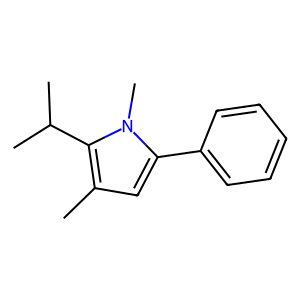

In [36]:
# Test 1 
input_smiles= "C(C)(C)C(=O)C(C)CC(=O)c1ccccc1"
input_smiles_2 = "CN"
result = Chem.MolFromSmiles(heterocycle_synthesis_function(input_smiles, input_smiles_2))
Draw.MolToImage(result)

<div style="font-size:11pt;"> When searching for the nitrogen index (or start_pattern), the code doesn't anticipate that there may be more than one. As a result, the code will settle on the one with the smallest index and react with the elements detected. This is not the desired reaction.</div>

In [47]:
# Test 2 
input_smiles="CC(C)C(=O)C(CC=O)CC(=O)c1ccccc1"
input_smiles_2 = "CN"
result = heterocycle_synthesis_function(input_smiles, input_smiles_2)

assert result == "O=CCc1cc(-c2ccccc2)n(C)c1C(C)C"

AssertionError: 

<span style="font-size:14pt; text-decoration:underline;"> Test of Imine Formation </span>

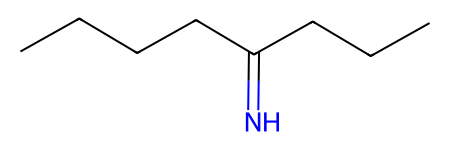

In [38]:
# Test 1 
start_input_smiles = "CCCCC(=O)CCC"
condition_input = "4<pH<6"
Imine_Formation2_function (start_input_smiles , condition_input)

<div style="font-size:11pt;"> The limitation of this code is that if there is more than one carbonyl, only one imine will form.</div>

In [39]:
# Test 2
start_input_smiles = "CCC(=O)CC(=O)CCC"
condition_input = "4<pH<6"
result = Imine_Formation2_function (start_input_smiles , condition_input)

assert result == "CCC(=N)CC(=N)CCC"

AssertionError: 

<span style="font-size:14pt; text-decoration:underline;"> Test of the Strecker Reaction </span>

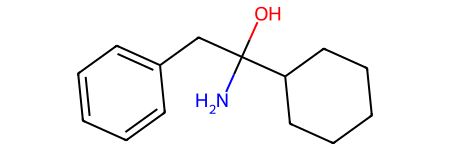

In [40]:
# Test 1 
input_smiles= "c1ccccc1CC(=O)C1CCCCC1"
strecker_reaction(input_smiles)

<div style="font-size:11pt;"> The limitation of this code is that the oxygen with the smallest index will be deleted, along with its neighboring carbon, and the second oxygen will carry out the reaction correctly. This is due to the fact that the code doesn't allow for more than one carbonyl in the starting molecule, so it deletes both before attaching the R's to the carbon corresponding to the indexes provided, which in the case of this molecule are the wrong ones. </div>

In [41]:
# Test 2 
input_smiles= "c1ccccc1CC(=O)CCC(=O)CCC"
result = Chem.MolToSmiles(strecker_reaction(input_smiles))

assert result == "c1ccccc1CC(O)(N)CCC(=O)CCC"

AssertionError: 

<span style="font-size:14pt; text-decoration:underline;"> Test of the Reduction of Cyanohydrine </span>

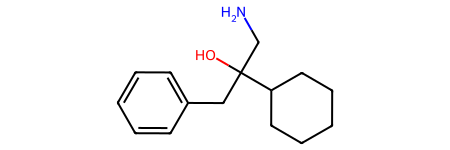

In [42]:
# Test 1 
input_smiles= "c1ccccc1CC(=O)C1CCCCC1"
reduction_cyanohydrine_function(input_smiles)

<div style="font-size:11pt;"> The limitation of this code is that the oxygen with the smallest index will be deleted, along with its neighboring carbon, and the second oxygen will carry out the reaction correctly. This is due to the fact that the code doesn't allow for more than one carbonyl in the starting molecule, so it deletes both before attaching the R's to the carbon corresponding to the indexes provided, which in the case of this molecule are the wrong ones. </div>

In [43]:
# Test 2 
input_smiles= "c1ccccc1CC(=O)CCC(=O)CCC"
result = Chem.MolToSmiles(reduction_cyanohydrine_function(input_smiles))

assert result == "c1ccccc1CC(O)(CN)CCC(=O)CCC"

AssertionError: 

<span style="font-size:14pt; text-decoration:underline;"> Test of the Bisulfite Addition </span>

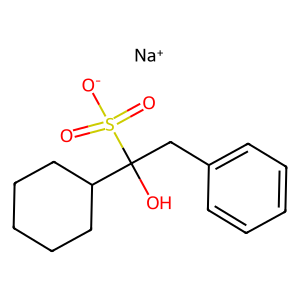

In [45]:
# Test 1 
input_smiles= "c1ccccc1CC(=O)C1CCCCC1"
result = Chem.MolFromSmiles(bisulfite_add_compounds1_function(input_smiles))
Draw.MolToImage(result)

<div style="font-size:11pt;"> The limitation of this code is that the oxygen with the smallest index will be deleted, along with its neighboring carbon, and the second oxygen will carry out the reaction correctly. This is due to the fact that the code doesn't allow for more than one carbonyl in the starting molecule, so it deletes both before attaching the R's to the carbon corresponding to the indexes provided, which in the case of this molecule are the wrong ones. </div>

In [46]:
# Test 2 
input_smiles= "c1ccccc1CC(=O)CCC(=O)CCC"
result = reduction_cyanohydrine_function(input_smiles)

assert result == "c1ccccc1CC(O)(S(=O)(=O)[O-].[Na+])CCC(=O)CCC"

AssertionError: 